IMPORT ALL LIBRARIES

In [1]:
#importing libraries
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras import layers,models
import os
import cv2
from google.colab.patches import cv2_imshow
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


ANNOTATE AND ARRANGE THE DATASET HAVING IMAGES IN .jpg or .png or .jpeg with yolo annotated text file .txt where 0 ---> No helmet
                                         1 ---> helmet

In [ ]:
!unzip "/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/bikerearviewimagess.zip" -d "/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset"

In [ ]:
!python /content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/pascal_to_yolo.py

BikesHelmets10.png  : annotated 
BikesHelmets1.png  : annotated 
BikesHelmets0.png  : annotated 
BikesHelmets102.png  : annotated 
BikesHelmets103.png  : annotated 
BikesHelmets100.png  : annotated 
BikesHelmets101.png  : annotated 
BikesHelmets104.png  : annotated 
BikesHelmets106.png  : annotated 
BikesHelmets105.png  : annotated 
BikesHelmets107.png  : annotated 
BikesHelmets108.png  : annotated 
BikesHelmets11.png  : annotated 
BikesHelmets109.png  : annotated 
BikesHelmets700.png  : annotated 
BikesHelmets551.png  : annotated 
BikesHelmets412.png  : annotated 
BikesHelmets588.png  : annotated 
BikesHelmets403.png  : annotated 
BikesHelmets185.png  : annotated 
BikesHelmets748.png  : annotated 
BikesHelmets426.png  : annotated 
BikesHelmets170.png  : annotated 
BikesHelmets167.png  : annotated 
BikesHelmets32.png  : annotated 
BikesHelmets183.png  : annotated 
BikesHelmets745.png  : annotated 
BikesHelmets150.png  : annotated 
BikesHelmets71.png  : annotated 
BikesHelmets321.png  :

In [ ]:
print(len(os.listdir("/content/drive/MyDrive/datasets/Helmet_Dataset/annotations")))
print(len(os.listdir("/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels")))

764
764


In [ ]:
dir_temp = "/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/labels"
for f in os.listdir(dir_temp):
  if f[:14] == "bike_rear_view":
    with open(dir_temp+"/"+f,"r") as ff:
      l = ff.readlines()
      updated = []
      for k in l:
         k = str(int(not int(k[0])))+k[1:]
         updated.append(k)
      with open(dir_temp+"/"+f,"w") as fw:
         for w in updated:
             fw.write(w)
      print(l, " in file read")
      print(updated," in file write")

['0 0.578125 0.273000 0.084375 0.146000\n', '0 0.620313 0.286000 0.075000 0.116000\n']  in file read
['1 0.578125 0.273000 0.084375 0.146000\n', '1 0.620313 0.286000 0.075000 0.116000\n']  in file write
['1 0.649219 0.400447 0.054688 0.093960\n', '1 0.460938 0.420582 0.056250 0.053691\n']  in file read
['0 0.649219 0.400447 0.054688 0.093960\n', '0 0.460938 0.420582 0.056250 0.053691\n']  in file write
['0 0.367925 0.350926 0.169811 0.116667\n']  in file read
['1 0.367925 0.350926 0.169811 0.116667\n']  in file write
['1 0.503425 0.086585 0.102740 0.153659\n']  in file read
['0 0.503425 0.086585 0.102740 0.153659\n']  in file write
['0 0.331699 0.169118 0.081699 0.137255\n', '0 0.272059 0.147059 0.099673 0.142157\n']  in file read
['1 0.331699 0.169118 0.081699 0.137255\n', '1 0.272059 0.147059 0.099673 0.142157\n']  in file write
['1 0.533333 0.213333 0.146667 0.120000\n']  in file read
['0 0.533333 0.213333 0.146667 0.120000\n']  in file write
['1 0.484513 0.098451 0.119469 0.130531\

In [ ]:
dir_temp = "/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/labels"
for f in os.listdir(dir_temp):
    if f[:12] == "BikesHelmets":
      os.remove(dir_temp+"/"+f)

In [ ]:
#shift files all into one subdirectory
def shift_files(src_path,dest_path):
    directory = os.listdir(src_path)
    for file in directory:
      shutil.move(os.path.join(src_path,file), os.path.join(dest_path,file))
    print("shifted all the files from "+src_path+" to "+dest_path)

In [ ]:
#shift files from source to destination
shift_files("/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/labels","/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels")

shifted all the files from /content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/labels to /content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels


In [ ]:
destination_labels = "/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/labels"
destination_images = "/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/images"
main_dir = "/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset"
dir = os.listdir(main_dir)
for files in dir:
  if files.endswith('.jpg'):
      shutil.move(os.path.join(main_dir,files),os.path.join(destination_images,files))
      print("------inside jpg")
  if files.endswith('.jpeg'):
      shutil.move(os.path.join(main_dir,files),os.path.join(destination_images,files))
      print("------inside jpeg")
  if files.endswith('.png'):
      shutil.move(os.path.join(main_dir,files),os.path.join(destination_images,files))
      print("------inside png")
  if files.endswith('.txt'):
      shutil.move(os.path.join(main_dir,files),os.path.join(destination_labels,files))
      print("------inside txt")
print("files shifted succesfully")

files shifted succesfully


In [3]:
def yolo_to_coco(x_center, y_center, w, h,  image_w, image_h):
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w)/2
    y1 = ((2 * y_center * image_h) - h)/2
    return [int(abs(x1)), int(y1), int(w), int(h)]

In [ ]:
def yolo_to_coco2(x,y,width,height):
  x_min = x - width / 2
  y_min = y - height / 2
  x_max = x + width / 2
  y_max = y + height / 2
  return [x_min, y_min, x_max - x_min, y_max - y_min]

(229, 400, 3)
[1.0, 0.45375, 0.18340611353711792, 0.0975, 0.2183406113537118] [162, 17, 39, 50]
pt1 and pt2 (162, 17) (201, 67)
[1.0, 0.45375, 0.18340611353711792, 0.0975, 0.2183406113537118]


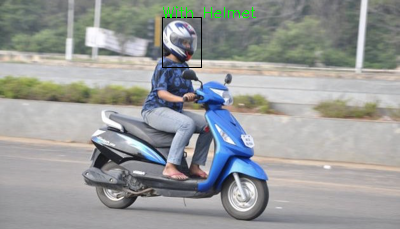

In [4]:
image_path = "/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/images/BikesHelmets445.png"
label_path = "/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels/BikesHelmets445.txt"
# font
font = cv2.FONT_HERSHEY_SIMPLEX
with open(label_path) as f:
  val = f.readlines()
val = [v[:-1].split(" ") for v in val]
img = cv2.imread(image_path)
print(img.shape)
img2 = PIL.Image.open(image_path)
for i in val:
    i = [float(v) for v in i]
    j = yolo_to_coco(i[1],i[2],i[3],i[4],img.shape[1],img.shape[0])
    print(i,j)
    pt1 = (j[0],j[1])
    pt2 = (j[0]+j[2],j[1]+j[3])
    print("pt1 and pt2",pt1,pt2)
    print(i)
    if i[0] == 0:
        category = "Without Helmet"
    else:
        category = "With Helmet"
    cv2.rectangle(img,pt1,pt2,(0,0,0))
    cv2.putText(img,category,pt1,font,0.5,(0,255,0))
cv2_imshow(img)

GENERATE ANNOTATED DATA

In [5]:
def split_files(full_data_labels_path,full_data_images_path, image_ext = '.jpg', split_percentage = [70, 20]):
    files = []
    helmets,no_helmets = 0,0
    for file in os.listdir(full_data_labels_path):
        if file.endswith(".txt"):
            with open(full_data_labels_path + "/" + file, 'r') as fp:
                lines = fp.readlines()
            strip = file[0:len(file) - len(".txt")]
            image_path = full_data_images_path + "/" + strip
            jpg_check = image_path+".jpg"
            jpeg_check = image_path+".jpeg"
            png_check = image_path+".png"
            if os.path.isfile(jpg_check):
              for l in lines:
                if l[0][0] == '1':
                  helmets += 1
                else:
                  no_helmets += 1
              files.append(strip)
            if os.path.isfile(jpeg_check):
              for l in lines:
                if l[0][0] == '1':
                  helmets += 1
                else:
                  no_helmets += 1
              files.append(strip)
            if os.path.isfile(png_check):
              for l in lines:
                if l[0][0] == '1':
                  helmets += 1
                else:
                  no_helmets += 1
              files.append(strip)
    size = len(files)
    print(str(size) + " size of dataset")
    print(str(helmets) + " instances of helmet")
    print(str(no_helmets) + " instances of no helmet")
    random.shuffle(files)

    split_training = int(split_percentage[0] * size / 100)
    split_validation = split_training + int(split_percentage[1] * size / 100)

    return files[0:split_training], files[split_training:split_validation], files[split_validation:]


In [6]:
#training_files, validation_files, test_files = list_files()
training_files, validation_files, test_files = split_files("/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels","/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/images")

971 size of dataset
1191 instances of helmet
688 instances of no helmet


In [7]:
print("SIZE OF TRAINING DATA : ",len(training_files))
print("SIZE OF VALIDATION DATA : ",len(validation_files))
print("SIZE OF TESTING DATA : ",len(test_files))

SIZE OF TRAINING DATA :  679
SIZE OF VALIDATION DATA :  194
SIZE OF TESTING DATA :  98


In [8]:
input_size = 512
def format_image(img, box):
    #resize images
    height, width = img.shape
    max_size = max(height, width)
    r = max_size / input_size
    new_width = int(width / r)
    new_height = int(height / r)
    new_size = (new_width, new_height)
    resized = cv2.resize(img, new_size, interpolation= cv2.INTER_LINEAR)
    new_image = np.zeros((input_size, input_size), dtype=np.uint8)
    new_image[0:new_height, 0:new_width] = resized
    #changing the structure of bounding box co ordinates according to image resolution
    new_box = []
    for subbox in box:
       x, y, w, h = subbox[1], subbox[2], subbox[3], subbox[4]
       new_box.append([int(subbox[0]),int((x - 0.5*w)* width / r), int((y - 0.5*h) * height / r), int(w*width / r), int(h*height / r)])
    return new_image, new_box

In [10]:
def format_rgb_image(image):
  return cv2.resize(image, (512, 512))

[[0.0, 0.034375, 0.076316, 0.05625, 0.110526], [0.0, 0.229687, 0.078947, 0.09375, 0.136842], [0.0, 0.441406, 0.086842, 0.070312, 0.152632], [0.0, 0.571094, 0.119737, 0.092188, 0.202632], [0.0, 0.814063, 0.111842, 0.0625, 0.160526], [0.0, 0.908594, 0.046053, 0.054688, 0.081579], [0.0, 0.775, 0.107895, 0.04375, 0.105263]]


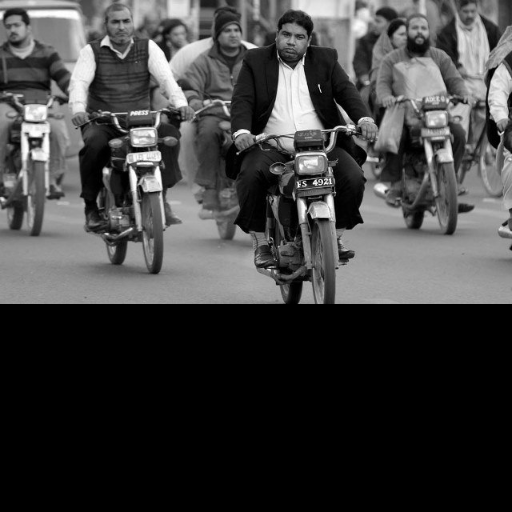

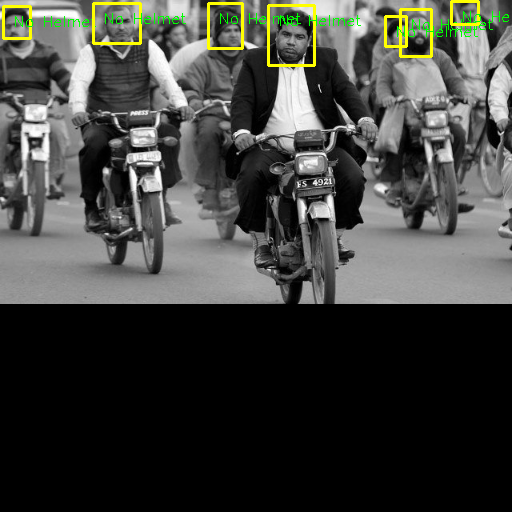

(36,) tf.Tensor(
[[0.         0.00585938 0.01171875 0.0546875  0.06445312 0.
  0.18164062 0.00585938 0.09375    0.08007812 0.         0.40625
  0.00585938 0.06835938 0.08984375 0.         0.5234375  0.00976562
  0.09179688 0.11914062 0.         0.78125    0.01757812 0.0625
  0.09375    0.         0.8808594  0.00195312 0.0546875  0.046875
  0.         0.7519531  0.03125    0.04296875 0.06054688 0.        ]], shape=(1, 36), dtype=float32) (36,)


In [9]:
img = cv2.imread("/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/images/1.jpg",0)
box = []
with open("/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels/1.txt","r") as f:
  lines = f.readlines()
  for l in lines:
    l = l[:-1]
    box.append(list(l.split(" ")))
if len(box) == 1:
  box = box[0]
  box = [[float(v) for v in box]]
else:
  box = [[float(v) for v in subbox] for subbox in box]
print(box)
new_img,new_box = format_image(img,box)
cv2_imshow(new_img)
color_img = cv2.cvtColor(new_img, cv2.COLOR_GRAY2RGB)
for subbox in new_box:
  if subbox[0] == 0:
    category = "No Helmet"
  else:
    category = "Helmet"
  org = (subbox[1]+10,subbox[2]+20)
  cv2.rectangle(color_img, subbox[1:], (0, 255, 255), 2)
  cv2.putText(color_img,category,org,font,0.5,(0,255,0))
cv2_imshow(color_img)
temp_box = np.asarray(new_box, dtype=float) / input_size
label = np.append(temp_box, 0)
Y = []
Y.append(label)
Y = tf.convert_to_tensor(Y, dtype=tf.float32)
Z = tf.ragged.constant(label, dtype=tf.float32)
print(label.shape,Y,Z.shape)

In [25]:
def load_data(files, full_data_images_path,full_data_labels_path):
    X = []
    Y = []
    IMG = []
    annotations_data = []
    for file in files:
        jpg_check = file+".jpg"
        jpeg_check = file+".jpeg"
        png_check = file+".png"
        #check if it is a jpg file
        if os.path.isfile(full_data_images_path+"/"+jpg_check):
          img = cv2.imread(os.path.join(full_data_images_path, jpg_check), cv2.IMREAD_GRAYSCALE)
          print("is jpg",file)
        #check if it is a jpeg file
        if os.path.isfile(full_data_images_path+"/"+jpeg_check):
          img = cv2.imread(os.path.join(full_data_images_path, jpeg_check), cv2.IMREAD_GRAYSCALE)
          print("is jpeg",file)
        #check if it is a png file
        if os.path.isfile(full_data_images_path+"/"+png_check):
          img = cv2.imread(os.path.join(full_data_images_path, png_check), cv2.IMREAD_GRAYSCALE)
          print("is png",file)

        box = []
        with open(full_data_labels_path + "/" + file + ".txt", 'r') as fp:
            lines = fp.readlines()
        for l in lines:
           l = l[:-1]
           box.append(list(l.split(" ")))

        # if there is only one bbox object for an image
        if len(box) == 1:
          box = box[0]
          box = [[float(v) for v in box]]
        #  if there is more than one bbox object for an image
        else:
          box = [[float(v) for v in subbox] for subbox in box]
        label_boxes = box

        #format the image and bounding boxes according to resolution
        if img is None:
          continue
        # IMG.append(format_rgb_image(img))
        img, box = format_image(img, box)
        #print(box)
        temp_box = box
        updated_box = []
        for b in temp_box:
          temp_box = np.asarray(b[1:], dtype=float) / input_size
          temp_box = np.append(int(b[0]),temp_box)
          updated_box.append(temp_box)
        #print(updated_box)
        #print(box,label_boxes)
        img = img.astype(float) / 255.
        X.append(img)
        Y.append(updated_box)
        print("file : ",Y)
        annotations_data.append(updated_box)
    print(annotations_data,len(annotations_data))
    # IMG = np.array(IMG)
    # IMG = np.expand_dims(IMG, axis=3)
    # IMG = tf.convert_to_tensor(IMG, dtype=tf.float32)
    X = np.array(X)
    X = np.expand_dims(X, axis=3)
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    Y = tf.ragged.constant(Y, dtype=tf.float32)
    #result = tf.data.Dataset.from_tensor_slices((X, Y))
    #return result,annotations_data,X,Y
    return X,Y

In [ ]:
print(training_files)

['BikesHelmets43', 'bike_rear_view_27', 'BikesHelmets644', 'BikesHelmets605', 'BikesHelmets511', 'BikesHelmets534', 'BikesHelmets604', '106', 'BikesHelmets269', 'BikesHelmets146', '7', 'BikesHelmets466', 'BikesHelmets621', 'BikesHelmets212', '98', 'BikesHelmets582', 'BikesHelmets199', 'BikesHelmets565', 'BikesHelmets356', '153', 'BikesHelmets63', 'BikesHelmets423', 'BikesHelmets324', 'BikesHelmets548', '6', '148', 'BikesHelmets657', 'BikesHelmets629', 'BikesHelmets440', '93', '62', 'BikesHelmets692', 'bike_rear_view_29', 'BikesHelmets166', 'BikesHelmets492', '47', '118', 'BikesHelmets494', 'BikesHelmets607', 'BikesHelmets45', '69', 'BikesHelmets752', 'bike_rear_view_12', 'BikesHelmets627', '51', 'BikesHelmets590', 'BikesHelmets762', 'BikesHelmets170', '151', 'BikesHelmets18', 'BikesHelmets753', 'BikesHelmets486', 'BikesHelmets407', 'BikesHelmets760', 'bike_rear_view_15', 'BikesHelmets699', 'BikesHelmets66', '46', 'BikesHelmets213', 'BikesHelmets31', '5', '38', 'BikesHelmets211', 'Bikes

In [26]:
# raw_train_ds,train_label_boxes,X_train,Y_train = load_data(training_files,"/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/images","/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels")
X_train,Y_train = load_data(training_files,"/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/images","/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels")

Output hidden; open in https://colab.research.google.com to view.

In [27]:
# raw_validation_ds,validation_label_boxes,X_validation,Y_validation = load_data(validation_files,"/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/images","/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels")
X_validation,Y_validation = load_data(validation_files,"/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/images","/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels")

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
raw_test_ds,test_label_boxes,X_test,Y_test = load_data(test_files,"/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/images","/content/drive/MyDrive/datasets/Helmet_Dataset/custom_dataset/Updated_labels")

is png BikesHelmets132
file :  [[array([1.        , 0.86914062, 0.22851562, 0.09570312, 0.1171875 ]), array([1.        , 0.59179688, 0.15429688, 0.09960938, 0.11328125]), array([1.        , 0.421875  , 0.19140625, 0.07421875, 0.109375  ]), array([1.        , 0.26171875, 0.265625  , 0.05664062, 0.06835938]), array([1.        , 0.12695312, 0.3359375 , 0.0546875 , 0.0625    ])]]
is jpg 97
file :  [[array([1.        , 0.86914062, 0.22851562, 0.09570312, 0.1171875 ]), array([1.        , 0.59179688, 0.15429688, 0.09960938, 0.11328125]), array([1.        , 0.421875  , 0.19140625, 0.07421875, 0.109375  ]), array([1.        , 0.26171875, 0.265625  , 0.05664062, 0.06835938]), array([1.        , 0.12695312, 0.3359375 , 0.0546875 , 0.0625    ])], [array([1.        , 0.59375   , 0.109375  , 0.15039062, 0.11132812])]]
is jpg 108
file :  [[array([1.        , 0.86914062, 0.22851562, 0.09570312, 0.1171875 ]), array([1.        , 0.59179688, 0.15429688, 0.09960938, 0.11328125]), array([1.        , 0.4218

VISUALIZE DATASET

In [ ]:
print(type(raw_train_ds.take(1)))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>


In [ ]:
BATCH_SIZE = 32
plt.figure(figsize=(15, 5))
print(len(raw_train_ds),type(raw_test_ds))
for images, labels in raw_test_ds.take(1):
    # Display the image using Matplotlib
    color = (0, 0, 255)
    image = images.numpy().astype("float") * 255.0
    #image = image.astype(np.uint8)
    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    image = np.squeeze(image)
    #cv2_imshow(image)
    #print(type(image),type(color_img))
    box = labels.numpy()
    updated_img,updated_box = format_image(image,labels)
    for val in updated_box:
      pt1 = (abs(val[1]),abs(val[2]))
      pt2 = (abs(val[1])+abs(val[3]),abs(val[2])+abs(val[4]))
      print(val[:-1],pt1,pt2)
      cv2.rectangle(updated_img,pt1, pt2, color)
    plt.imshow(image_color)
    plt.axis('off')
    plt.show()

In [ ]:
BATCH_SIZE = 32
plt.figure(figsize=(15, 5))
print(len(raw_train_ds),type(raw_train_ds))
for images, labels in raw_train_ds:
    #print(images.shape,labels.shape,len(images),len(labels))
    # tf.print("Image:", images)
    # tf.print("Label:", labels)
    image_array = images.numpy()
    # Display the image using Matplotlib
    print(labels.numpy())
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [31]:
X_train = tf.data.Dataset.from_tensor_slices(X_train)
X_validation = tf.data.Dataset.from_tensor_slices(X_validation)

In [49]:
Y_train = tf.data.Dataset.from_tensor_slices(Y_train)

In [58]:
Y_validation = tf.data.Dataset.from_tensor_slices(Y_validation)

In [30]:
X_train

<_TensorSliceDataset element_spec=TensorSpec(shape=(512, 512, 1), dtype=tf.float32, name=None)>

In [32]:
def convert_image(image):
    image_rgb = tf.tile(image, [1, 1, 3])
    #reshaped_image = image_rgb
    expanded_image = tf.expand_dims(image_rgb, axis=0)
    #expanded_image = tf.repeat(expanded_image, repeats=tf.shape(image)[0], axis=0)
    expanded_image = tf.reshape(expanded_image, [512,512,3])
    return expanded_image
    #return tf.tile(expanded_image, ['None', 1, 1, 1])

# train_rgb= raw_train_ds.map(lambda image, label: (convert_image(image), label))
# print(train_rgb)
# validation_rgb = raw_validation_ds.map(lambda image, label: (convert_image(image), label))

In [33]:
X_train = X_train.map(lambda image:convert_image(image))

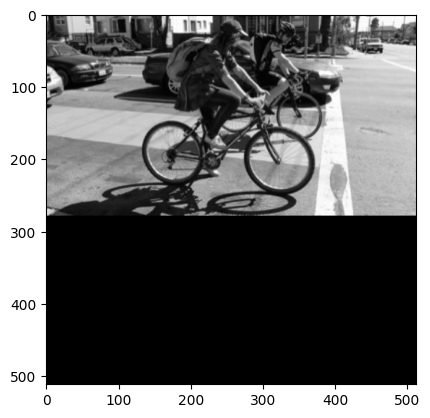

In [39]:
for i in X_train.take(1):
  plt.imshow(i)

In [ ]:
print(X_train.shape)

(678, 512, 512, 1)


In [ ]:
modified_X_train = tf.tile(X_train, [1, 1, 1, 3])
modified_X_train = tf.concat([modified_X_train,modified_X_train,modified_X_train], axis=-1)

In [ ]:
print(modified_X_train.shape)

(678, 512, 512, 3)


In [ ]:
print(X_train[0:2].shape,modified_X_train[0:2].shape,end=" ")

(2, 512, 512, 1) (2, 512, 512, 3) 

(512, 512, 1)


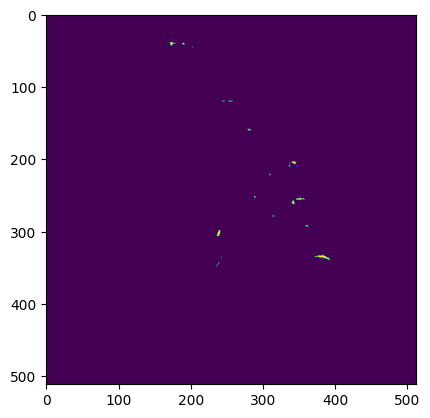

In [ ]:
print(X_train[0].shape)
plt.imshow(X_train[0])

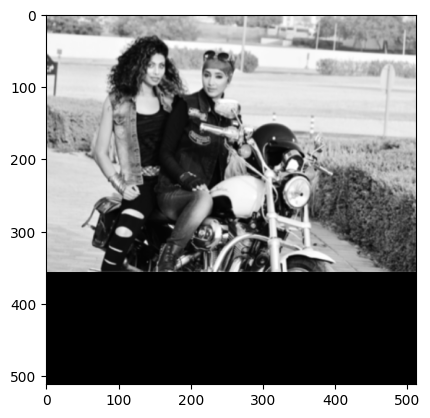

In [ ]:
plt.imshow(modified_X_train[0])

<tf.RaggedTensor [[0.0, 0.34375, 0.037109375, 0.19921875, 0.22070312]]>


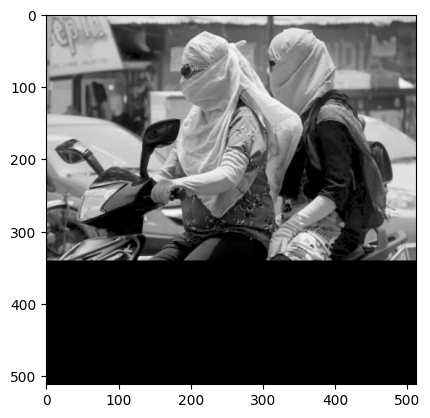

In [ ]:
for i,rt in train_rgb.take(1):
  print(rt)
  plt.imshow(i.numpy())

In [ ]:
list_dataset = list(train_rgb)
tensor_dataset = tuple(tf.convert_to_tensor(example) for example in list_dataset)
# Create a new dataset using the tensor slices
new_train_dataset = tf.data.Dataset.from_tensor_slices(tensor_dataset)

In [52]:
def modify_dataset(dataset):
  def add_batch_dimension(image,label):
     return tf.expand_dims(image, axis=0),label
  dataset = dataset.map(add_batch_dimension)
  input_tensor = dataset.element_spec
  output_shape = (None,) + input_tensor[0].shape[1:]
  print(input_tensor,output_shape)
  new_dataset = tf.data.Dataset.from_generator(lambda: train_rgb, output_signature=(
      tf.TensorSpec(shape=output_shape)
  ))
  return new_dataset

In [ ]:
train_rgb = modify_dataset(train_rgb)
validation_rgb = modify_dataset(validation_rgb)

(TensorSpec(shape=(1, 512, 512, 3), dtype=tf.float32, name=None), RaggedTensorSpec(TensorShape([None, None]), tf.float32, 1, tf.int64)) (None, 512, 512, 3)
(TensorSpec(shape=(1, 512, 512, 3), dtype=tf.float32, name=None), RaggedTensorSpec(TensorShape([None, None]), tf.float32, 1, tf.int64)) (None, 512, 512, 3)


In [ ]:
print(validation_rgb.take(1))

<_TakeDataset element_spec=TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None)>


BUILD THE MODEL

In [40]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models

In [41]:
input_shape = (512, 512, 3)
input_tensor = tf.keras.Input(shape=input_shape, dtype=tf.float32)
def feature_extractor_using_vgg16():
  return tf.keras.applications.vgg16.VGG16(include_top=False,input_tensor=input_tensor,weights='imagenet')
  #return tf.keras.applications.vgg16.VGG16(include_top=False,input_shape=input_shape,weights='imagenet')

In [42]:
base_model = feature_extractor_using_vgg16()
#base_model.layers.pop(0)
base_model.trainable = False

58889256/58889256 [==============================] - 1s 0us/step


In [43]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [ ]:
print(train_rgb.take(1))

<_TakeDataset element_spec=TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None)>


In [ ]:
print(base_model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
print(type(train_rgb),type(raw_train_ds))

<class 'tensorflow.python.data.ops.flat_map_op._FlatMapDataset'> <class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [ ]:
for image,label in train_rgb.take(1):
  print(image)
  print(label)

CREATE A NEW DATASET WITH BATCH DIMENSIONS (None,512,512,3)

In [ ]:
preprocessed_images = [preprocess_input(tf.expand_dims(image, axis=0)) for image,labels in train_rgb]
labels_changed = [label for images,label in train_rgb]
# Create a TensorFlow dataset
updated_train_dataset = tf.data.Dataset.from_tensor_slices((preprocessed_images, labels_changed))

In [44]:
num_boxes,num_classes = 6,2
#model.add(tf.keras.layers.InputLayer(input_shape=(None,512, 512, 3)))
conv6 = tf.keras.layers.Conv2D(1024, kernel_size=(3, 3), padding='same', activation='relu')(base_model.output)
conv7 = tf.keras.layers.Conv2D(1024, kernel_size=(1, 1), padding='same', activation='relu')(conv6)
prediction = layers.Conv2D(num_classes * 4, kernel_size=(3, 3), padding='same')(conv7)
prediction = layers.Reshape((-1, 4))(prediction)
prediction_conf = layers.Conv2D(num_classes * num_boxes, kernel_size=(3, 3), padding='same')(conv7)
prediction_conf = layers.Reshape((-1, num_classes))(prediction_conf)
model = tf.keras.Model(inputs=base_model.input, outputs=[prediction, prediction_conf])

In [ ]:
print(len(train_label_boxes))

678


In [ ]:
updated_train_labels = []
for subarr in train_label_boxes:
  l = []
  for i in range(len(subarr)):
    v = ' '.join(list(map(str,subarr[i])))
    v = str(int(float(v[:3]))) + " " + v[4:]
    l.append(v)
  updated_train_labels.append(l)

In [ ]:
updated_train_labels

[['1 0.44921875 0.0859375 0.267578125 0.203125',
  '0 0.119140625 0.19921875 0.189453125 0.1796875'],
 ['1 0.658203125 0.251953125 0.08203125 0.08984375',
  '1 0.4609375 0.234375 0.068359375 0.083984375',
  '1 0.796875 0.236328125 0.0703125 0.05859375',
  '1 0.935546875 0.23828125 0.0625 0.1015625',
  '1 0.1796875 0.208984375 0.04296875 0.041015625',
  '1 0.333984375 0.212890625 0.05078125 0.052734375'],
 ['1 0.19140625 0.078125 0.287109375 0.2890625'],
 ['1 0.4296875 0.07421875 0.1171875 0.107421875'],
 ['1 0.49609375 0.259765625 0.046875 0.05078125',
  '1 0.71484375 0.271484375 0.044921875 0.041015625',
  '0 0.283203125 0.255859375 0.044921875 0.05859375',
  '0 0.58203125 0.279296875 0.037109375 0.033203125',
  '1 0.83984375 0.283203125 0.037109375 0.037109375',
  '1 0.169921875 0.25390625 0.048828125 0.0546875',
  '1 0.6484375 0.265625 0.046875 0.048828125',
  '0 0.798828125 0.283203125 0.029296875 0.03125'],
 ['1 430.0 177.0 82.0 81.75',
  '1 719.0 182.25 84.0 72.75',
  '1 412.0 17

In [50]:
combined_dataset = tf.data.Dataset.zip((X_train,Y_train))

In [53]:
combined_dataset = modify_dataset(combined_dataset)

(TensorSpec(shape=(1, 512, 512, 3), dtype=tf.float32, name=None), RaggedTensorSpec(TensorShape([None, None]), tf.float32, 1, tf.int64)) (None, 512, 512, 3)


In [59]:
combined_dataset2 = tf.data.Dataset.zip((X_validation,Y_validation))
combined_dataset2 = modify_dataset(combined_dataset2)

(TensorSpec(shape=(1, 512, 512, 1), dtype=tf.float32, name=None), RaggedTensorSpec(TensorShape([None, None]), tf.float32, 1, tf.int64)) (None, 512, 512, 1)


In [69]:
print(combined_dataset.take(1))
# validation_f, validation_l = zip(*combined_dataset2)

<_TakeDataset element_spec=TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None)>


In [73]:
def total_loss(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    pos_mask = tf.cast(tf.equal(tf.squeeze(y_true[:, :, 4:5], axis=-1), 0.0),
                       tf.float32)
    num_pos = tf.maximum(
        1.0, tf.cast(tf.math.count_nonzero(pos_mask, axis=-1), tf.float32))
    loc_loss = tf.compat.v1.losses.huber_loss(labels=y_true[:, :, :4],
                                              predictions=y_pred[:, :, :4],
                                              reduction="none")

    loc_loss = tf.reduce_sum(loc_loss, axis=-1)
    loc_loss = tf.where(tf.equal(pos_mask, 1.0), loc_loss, 0.0)
    loc_loss = tf.reduce_sum(loc_loss, axis=-1)
    loc_loss = loc_loss / num_pos

    cce = tf.losses.CategoricalCrossentropy(from_logits=True,
                                            reduction=tf.losses.Reduction.NONE)
    cross_entropy = cce(y_true[:, :, 4:], y_pred[:, :, 4:])

    #neg:pos 3:1
    num_neg = 3.0 * num_pos

    #Negative Mining
    neg_cross_entropy = tf.where(tf.equal(pos_mask, 0.0), cross_entropy, 0.0)
    sorted_dfidx=tf.cast(tf.argsort(neg_cross_entropy,\
                            direction='DESCENDING',axis=-1),tf.int32)
    rank = tf.cast(tf.argsort(sorted_dfidx, axis=-1), tf.int32)
    num_neg = tf.cast(num_neg, dtype=tf.int32)
    neg_loss = tf.where(rank < tf.expand_dims(num_neg, axis=1),
                        neg_cross_entropy, 0.0)

    pos_loss = tf.where(tf.equal(pos_mask, 1.0), cross_entropy, 0.0)
    clas_loss = tf.reduce_sum(pos_loss + neg_loss, axis=-1)
    clas_loss = clas_loss / num_pos
    totalloss = loc_loss + clas_loss
    return totalloss

In [74]:
model.compile(
    optimizer='adam',
    loss=total_loss,
    metrics=['accuracy'],
)

In [75]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
model.fit(combined_dataset,epochs=10,validation_data=combined_dataset2,callbacks=[es],batch_size=32)

Epoch 1/10


ValueError: ignored

In [ ]:
dataset_size = tf.data.experimental.cardinality(train_rgb).numpy()
print(dataset_size)

679


In [ ]:
modified_tensors_x,modified_tensors_y = [],[]
for tensors in train_dataset:
  #print(type(tensors[0]),tensors[0].shape)
  modified_tensors_x.append(tensors[0][tf.newaxis])
  modified_tensors_y.append(tensors[1].to_tensor())

In [ ]:
#train_dataset = tf.data.Dataset.from_tensor_slices((modified_tensors_x,modified_tensors_y))
print(type(modified_tensors_x[0]),type(modified_tensors_y[0]))

<class 'tensorflow.python.framework.ops.EagerTensor'> <class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
train_dataset.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(512, 512, 3), dtype=tf.float32, name=None), RaggedTensorSpec(TensorShape([None, None]), tf.float32, 1, tf.int64))>

In [ ]:
dataset_size = list(train_rgb)
print(dataset_size)

[(<tf.Tensor: shape=(512, 512, 3), dtype=float32, numpy=
array([[[0.62352943, 0.62352943, 0.62352943],
        [0.57254905, 0.57254905, 0.57254905],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        ...,
        [0.7372549 , 0.7372549 , 0.7372549 ],
        [0.6666667 , 0.6666667 , 0.6666667 ],
        [0.5921569 , 0.5921569 , 0.5921569 ]],

       [[0.57254905, 0.57254905, 0.57254905],
        [0.53333336, 0.53333336, 0.53333336],
        [0.50980395, 0.50980395, 0.50980395],
        ...,
        [0.74509805, 0.74509805, 0.74509805],
        [0.69803923, 0.69803923, 0.69803923],
        [0.654902  , 0.654902  , 0.654902  ]],

       [[0.5176471 , 0.5176471 , 0.5176471 ],
        [0.48235294, 0.48235294, 0.48235294],
        [0.4745098 , 0.4745098 , 0.4745098 ],
        ...,
        [0.74509805, 0.74509805, 0.74509805],
        [0.73333335, 0.73333335, 0.73333335],
        [0.7254902 , 0.7254902 , 0.7254902 ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 512, 512, 64  1792        ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 512, 512, 64  36928       ['block1_conv1[0][0]']           
                                )                                                           

In [ ]:
count = 0
for layer in model.layers:
    if layer.name == "sequential_30":
        count += 1

print(f"Number of layers with name 'sequential_28': {count}")

Number of layers with name 'sequential_28': 0


MOBILENETV3 AS BACKBONE

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
model = MobileNetV2(weights='imagenet',input_shape=(512,512,3),include_top=False)

9406464/9406464 [==============================] - 0s 0us/step
